# Exploration et Préparation des Données - Sentiment140

Ce notebook explore le dataset Sentiment140 pour l'analyse de sentiments de tweets.

In [22]:
# Import des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration de l'affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 200)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Chargement des Données

In [23]:
# Chargement du dataset
column_names = ['sentiment', 'id', 'date', 'query', 'user', 'text']
df = pd.read_csv('../data/training.1600000.processed.noemoticon.csv',
                 encoding='latin-1',
                 names=column_names,
                 header=None)

print(f"Shape du dataset : {df.shape}")
print(f"Nombre de tweets : {len(df):,}")

Shape du dataset : (1600000, 6)
Nombre de tweets : 1,600,000


In [24]:
# Affichage des premières lignes
df.head(10)

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,"@LOLTrish hey long time no see! Yes.. Rains a bit ,only a bit LOL , I'm fine thanks , how's you ?"
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


## 2. Analyse Exploratoire

In [25]:
# Informations générales
print("Informations sur le dataset :")
print(df.info())
print("\n" + "="*50 + "\n")

# Statistiques descriptives
print("Statistiques descriptives :")
print(df.describe(include='all'))

Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   id         1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   query      1600000 non-null  object
 4   user       1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB
None


Statistiques descriptives :
           sentiment            id                          date     query  \
count   1.600000e+06  1.600000e+06                       1600000   1600000   
unique           NaN           NaN                        774363         1   
top              NaN           NaN  Mon Jun 15 12:53:14 PDT 2009  NO_QUERY   
freq             NaN           NaN                            20   1600000   
mean    2.000000e+00  1.998818e+09                    

In [26]:
# Vérification des valeurs manquantes
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())
print(f"\nPourcentage de valeurs manquantes : {df.isnull().sum().sum() / df.size * 100:.2f}%")

Valeurs manquantes par colonne :
sentiment    0
id           0
date         0
query        0
user         0
text         0
dtype: int64

Pourcentage de valeurs manquantes : 0.00%


Distribution des sentiments :
sentiment
0    800000
4    800000
Name: count, dtype: int64

Proportions :
sentiment
0    0.5
4    0.5
Name: proportion, dtype: float64


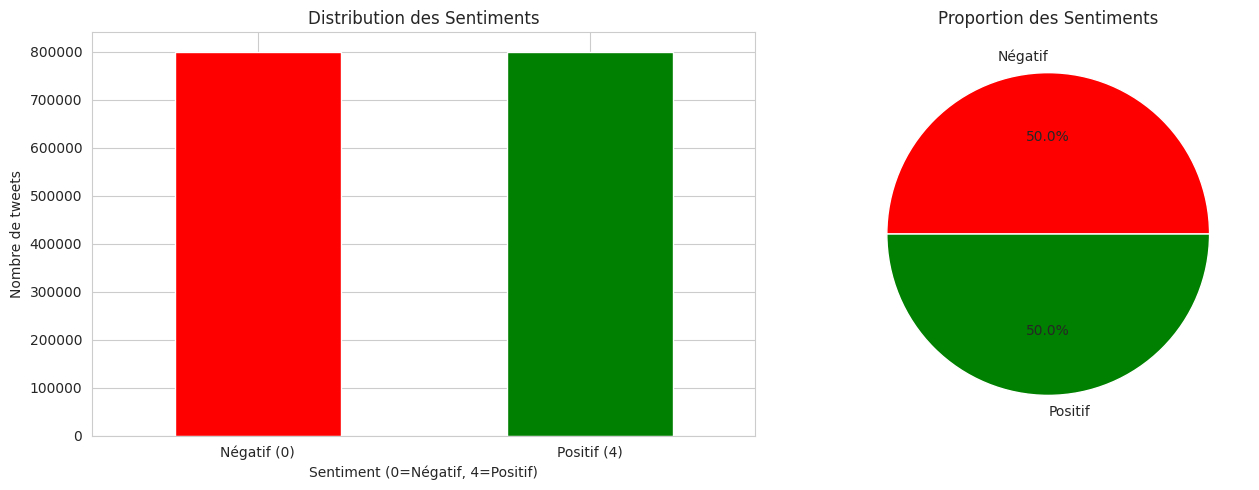

In [27]:
# Distribution des sentiments
print("Distribution des sentiments :")
print(df['sentiment'].value_counts().sort_index())
print("\nProportions :")
print(df['sentiment'].value_counts(normalize=True).sort_index())

# Visualisation
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

df['sentiment'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color=['red', 'green'])
ax[0].set_title('Distribution des Sentiments')
ax[0].set_xlabel('Sentiment (0=Négatif, 4=Positif)')
ax[0].set_ylabel('Nombre de tweets')
ax[0].set_xticklabels(['Négatif (0)', 'Positif (4)'], rotation=0)

df['sentiment'].value_counts(normalize=True).sort_index().plot(kind='pie', ax=ax[1],
                                                                 autopct='%1.1f%%',
                                                                 colors=['red', 'green'],
                                                                 labels=['Négatif', 'Positif'])
ax[1].set_title('Proportion des Sentiments')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [28]:
# Transformation du sentiment en binaire (0 et 1)
df['sentiment_binary'] = df['sentiment'].map({0: 0, 4: 1})
print("Conversion sentiment : 0 (négatif) -> 0, 4 (positif) -> 1")
print(df[['sentiment', 'sentiment_binary']].head())

Conversion sentiment : 0 (négatif) -> 0, 4 (positif) -> 1
   sentiment  sentiment_binary
0          0                 0
1          0                 0
2          0                 0
3          0                 0
4          0                 0


## 3. Analyse du Texte des Tweets

In [29]:
# Statistiques sur la longueur des tweets
df['text_length'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().str.len()

print("Statistiques de longueur des tweets :")
print(df[['text_length', 'word_count']].describe())

Statistiques de longueur des tweets :
        text_length    word_count
count  1.600000e+06  1.600000e+06
mean   7.409011e+01  1.317615e+01
std    3.644114e+01  6.957978e+00
min    6.000000e+00  1.000000e+00
25%    4.400000e+01  7.000000e+00
50%    6.900000e+01  1.200000e+01
75%    1.040000e+02  1.900000e+01
max    3.740000e+02  6.400000e+01


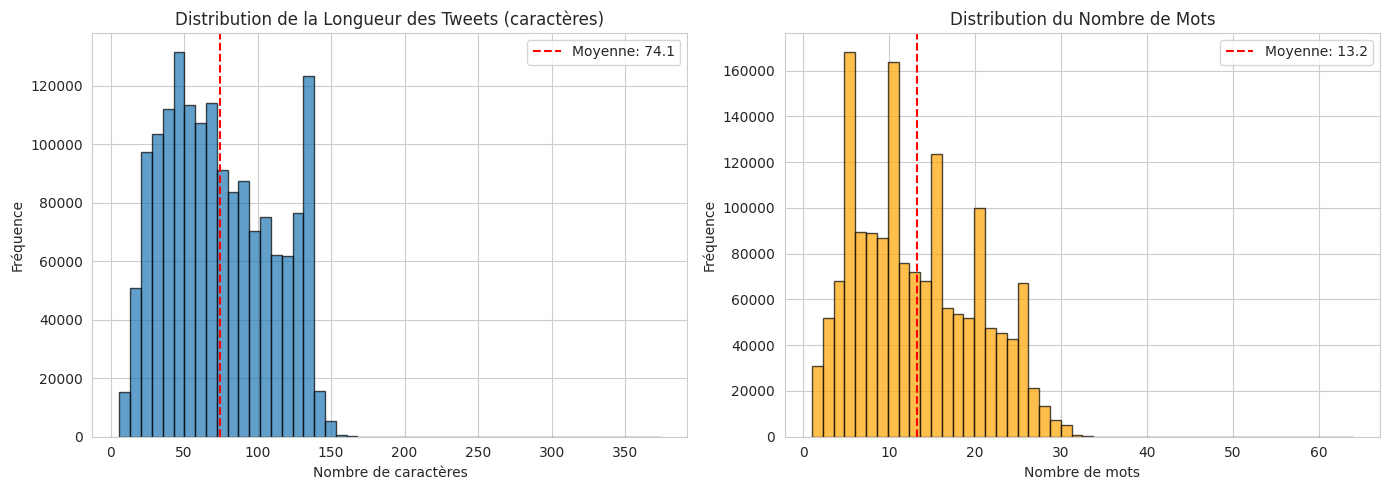

In [30]:
# Visualisation des longueurs
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

df['text_length'].hist(bins=50, ax=ax[0], edgecolor='black', alpha=0.7)
ax[0].set_title('Distribution de la Longueur des Tweets (caractères)')
ax[0].set_xlabel('Nombre de caractères')
ax[0].set_ylabel('Fréquence')
ax[0].axvline(df['text_length'].mean(), color='red', linestyle='--', label=f'Moyenne: {df["text_length"].mean():.1f}')
ax[0].legend()

df['word_count'].hist(bins=50, ax=ax[1], edgecolor='black', alpha=0.7, color='orange')
ax[1].set_title('Distribution du Nombre de Mots')
ax[1].set_xlabel('Nombre de mots')
ax[1].set_ylabel('Fréquence')
ax[1].axvline(df['word_count'].mean(), color='red', linestyle='--', label=f'Moyenne: {df["word_count"].mean():.1f}')
ax[1].legend()

plt.tight_layout()
plt.show()

Longueur moyenne des tweets par sentiment :
                  text_length  word_count
sentiment_binary                         
0                   74.301790   13.581984
1                   73.878433   12.770318


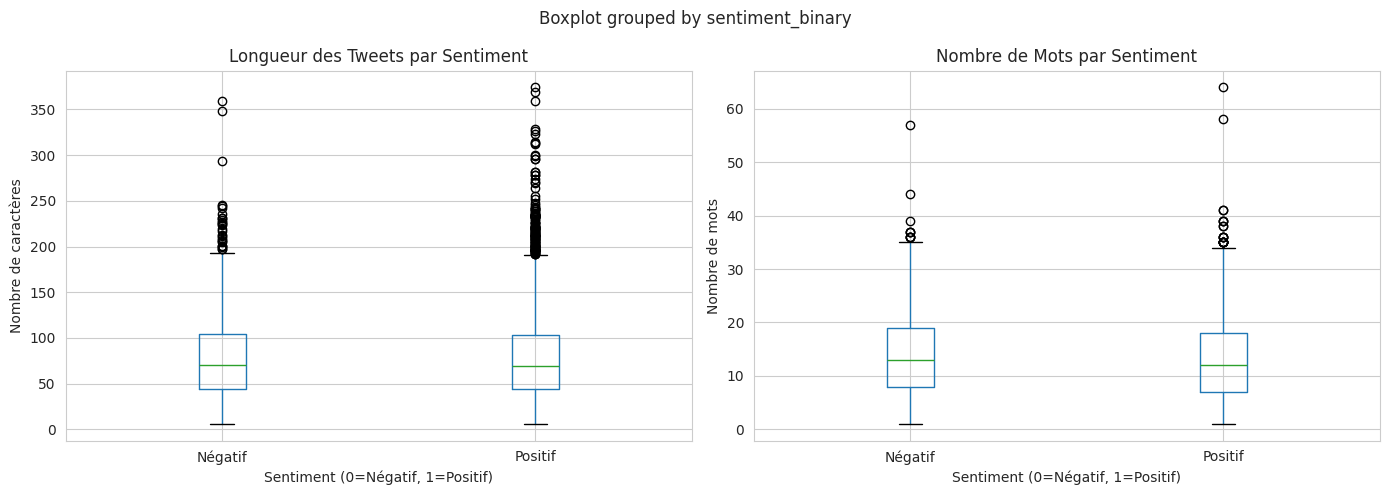

In [31]:
# Comparaison des longueurs par sentiment
print("Longueur moyenne des tweets par sentiment :")
print(df.groupby('sentiment_binary')[['text_length', 'word_count']].mean())

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

df.boxplot(column='text_length', by='sentiment_binary', ax=ax[0])
ax[0].set_title('Longueur des Tweets par Sentiment')
ax[0].set_xlabel('Sentiment (0=Négatif, 1=Positif)')
ax[0].set_ylabel('Nombre de caractères')
plt.sca(ax[0])
plt.xticks([1, 2], ['Négatif', 'Positif'])

df.boxplot(column='word_count', by='sentiment_binary', ax=ax[1])
ax[1].set_title('Nombre de Mots par Sentiment')
ax[1].set_xlabel('Sentiment (0=Négatif, 1=Positif)')
ax[1].set_ylabel('Nombre de mots')
plt.sca(ax[1])
plt.xticks([1, 2], ['Négatif', 'Positif'])

plt.tight_layout()
plt.show()

In [32]:
# Exemples de tweets par sentiment
print("="*80)
print("EXEMPLES DE TWEETS NÉGATIFS :")
print("="*80)
for i, text in enumerate(df[df['sentiment_binary'] == 0]['text'].sample(5, random_state=42).values, 1):
    print(f"{i}. {text}\n")

print("="*80)
print("EXEMPLES DE TWEETS POSITIFS :")
print("="*80)
for i, text in enumerate(df[df['sentiment_binary'] == 1]['text'].sample(5, random_state=42).values, 1):
    print(f"{i}. {text}\n")

EXEMPLES DE TWEETS NÉGATIFS :
1. @xnausikaax oh no! where did u order from? that's horrible 

2. A great hard training weekend is over.  a couple days of rest and lets do it again!  Lots of computer time to put in now 

3. Right, off to work  Only 5 hours to go until I'm free xD

4. I am craving for japanese food 

5. Jean Michel Jarre concert tomorrow  gotta work 7-3 before though 

EXEMPLES DE TWEETS POSITIFS :
1. Is lookin 4ward to a long weekend  really dont want to go to work 2day tho =[ x

2. #myweakness  Is music and i live to meet the people who make it 

3. figured out the Internet on my new iPod 

4. @hillsongunited can't wait to worship with you guys tonight. it'll be so much fun 

5. @sillybeggar Congrats James !! I'm sure the book is going to be a huge success 



## 4. Analyse des Caractéristiques du Texte

In [33]:
# Détection des mentions, hashtags, URLs
df['has_mention'] = df['text'].str.contains('@', regex=False)
df['has_hashtag'] = df['text'].str.contains('#', regex=False)
df['has_url'] = df['text'].str.contains('http', regex=False)

df['mention_count'] = df['text'].str.count('@')
df['hashtag_count'] = df['text'].str.count('#')
df['url_count'] = df['text'].str.count('http')

print("Présence de caractéristiques spéciales :")
print(f"Tweets avec mentions : {df['has_mention'].sum():,} ({df['has_mention'].mean()*100:.1f}%)")
print(f"Tweets avec hashtags : {df['has_hashtag'].sum():,} ({df['has_hashtag'].mean()*100:.1f}%)")
print(f"Tweets avec URLs : {df['has_url'].sum():,} ({df['has_url'].mean()*100:.1f}%)")

Présence de caractéristiques spéciales :
Tweets avec mentions : 746,432 (46.7%)
Tweets avec hashtags : 36,812 (2.3%)
Tweets avec URLs : 70,183 (4.4%)



Proportion de caractéristiques par sentiment :
                  has_mention  has_hashtag   has_url
sentiment_binary                                    
0                    0.381514     0.019662  0.029976
1                    0.551526     0.026353  0.057752


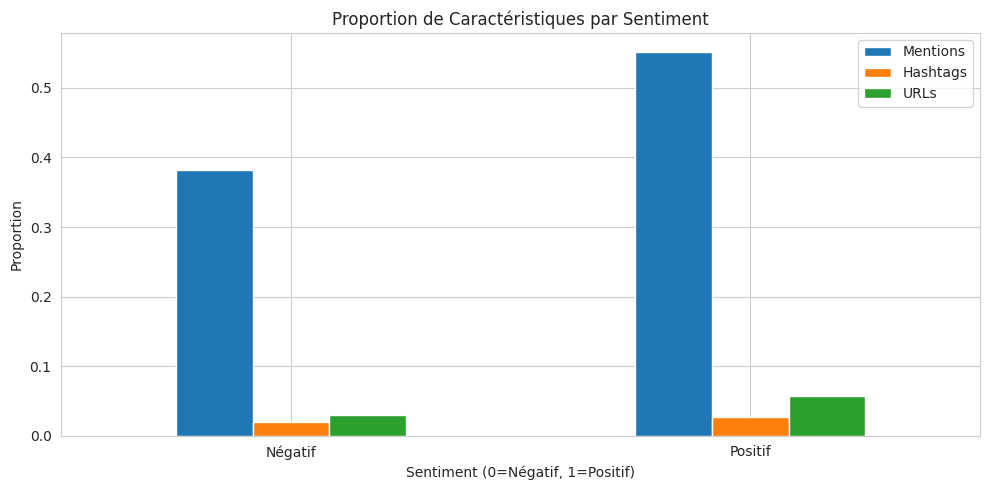

In [34]:
# Comparaison par sentiment
features_comparison = df.groupby('sentiment_binary')[['has_mention', 'has_hashtag', 'has_url']].mean()
print("\nProportion de caractéristiques par sentiment :")
print(features_comparison)

features_comparison.plot(kind='bar', figsize=(10, 5))
plt.title('Proportion de Caractéristiques par Sentiment')
plt.xlabel('Sentiment (0=Négatif, 1=Positif)')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['Négatif', 'Positif'], rotation=0)
plt.legend(['Mentions', 'Hashtags', 'URLs'])
plt.tight_layout()
plt.show()

In [35]:
# Analyse des utilisateurs
print("Statistiques sur les utilisateurs :")
print(f"Nombre d'utilisateurs uniques : {df['user'].nunique():,}")
print(f"Nombre moyen de tweets par utilisateur : {len(df) / df['user'].nunique():.2f}")

top_users = df['user'].value_counts().head(10)
print("\nTop 10 utilisateurs les plus actifs :")
print(top_users)

Statistiques sur les utilisateurs :
Nombre d'utilisateurs uniques : 659,775
Nombre moyen de tweets par utilisateur : 2.43

Top 10 utilisateurs les plus actifs :
user
lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
mcraddictal        276
tsarnick           248
what_bugs_u        246
Karen230683        238
DarkPiano          236
Name: count, dtype: int64


## 5. Analyse Temporelle

In [36]:
# Conversion de la date
df['datetime'] = pd.to_datetime(df['date'], format='%a %b %d %H:%M:%S PDT %Y')
df['date_only'] = df['datetime'].dt.date
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()

print("Période couverte par le dataset :")
print(f"Date de début : {df['datetime'].min()}")
print(f"Date de fin : {df['datetime'].max()}")
print(f"Durée : {(df['datetime'].max() - df['datetime'].min()).days} jours")

Période couverte par le dataset :
Date de début : 2009-04-06 22:19:45
Date de fin : 2009-06-25 10:28:31
Durée : 79 jours


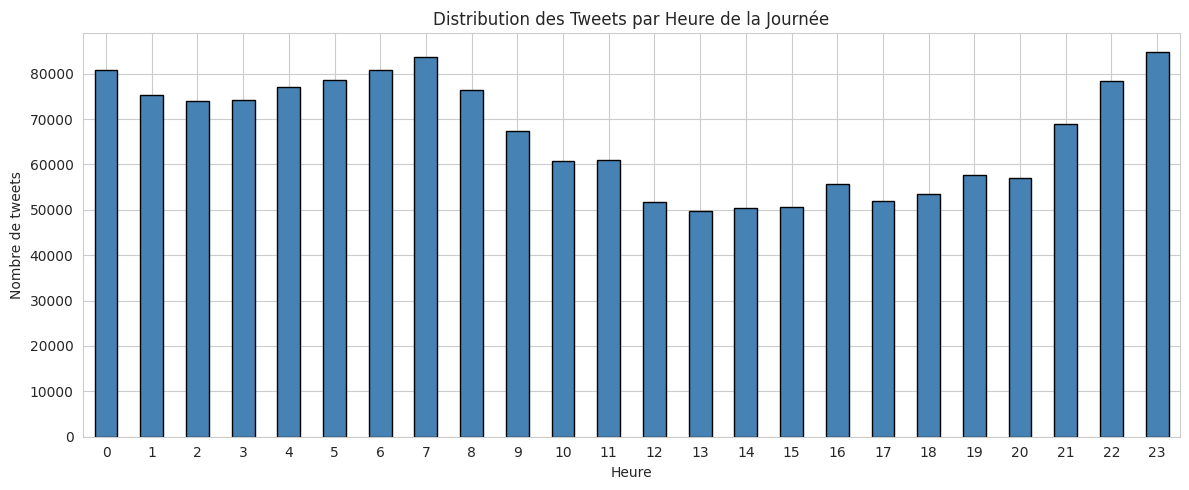

In [37]:
# Distribution par heure
hourly_dist = df['hour'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
hourly_dist.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Distribution des Tweets par Heure de la Journée')
plt.xlabel('Heure')
plt.ylabel('Nombre de tweets')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

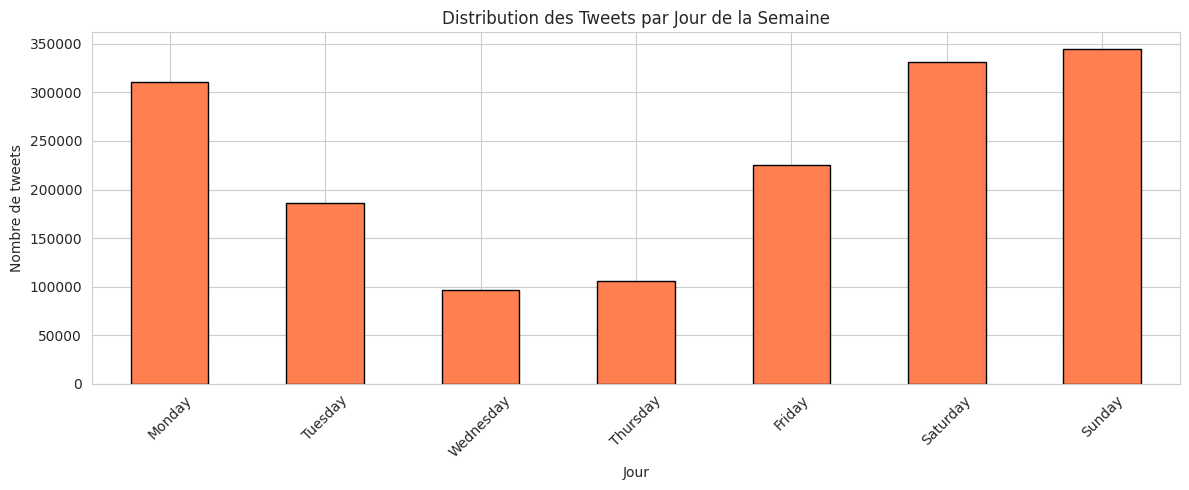

In [38]:
# Distribution par jour de la semaine
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_dist = df['day_of_week'].value_counts().reindex(day_order)

plt.figure(figsize=(12, 5))
day_dist.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Distribution des Tweets par Jour de la Semaine')
plt.xlabel('Jour')
plt.ylabel('Nombre de tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

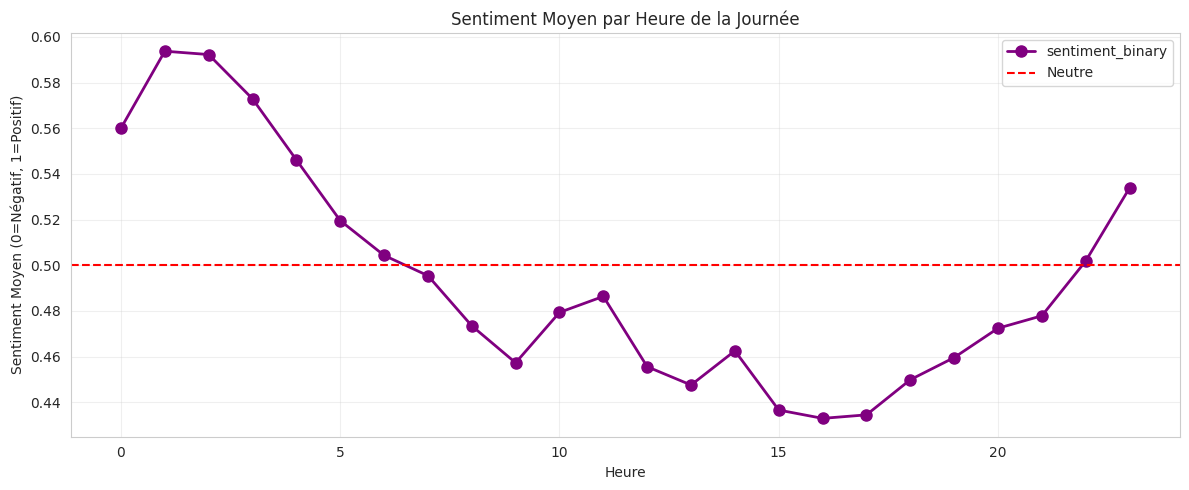

In [39]:
# Sentiment par heure
sentiment_by_hour = df.groupby('hour')['sentiment_binary'].mean()

plt.figure(figsize=(12, 5))
sentiment_by_hour.plot(marker='o', linewidth=2, markersize=8, color='purple')
plt.title('Sentiment Moyen par Heure de la Journée')
plt.xlabel('Heure')
plt.ylabel('Sentiment Moyen (0=Négatif, 1=Positif)')
plt.axhline(y=0.5, color='red', linestyle='--', label='Neutre')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## 6. Résumé de l'Exploration

In [40]:
print("="*80)
print("RÉSUMÉ DE L'EXPLORATION DES DONNÉES")
print("="*80)
print(f"\n1. VOLUME DE DONNÉES :")
print(f"   - Nombre total de tweets : {len(df):,}")
print(f"   - Nombre d'utilisateurs uniques : {df['user'].nunique():,}")
print(f"   - Période : {df['datetime'].min().date()} à {df['datetime'].max().date()}")

print(f"\n2. DISTRIBUTION DES SENTIMENTS :")
print(f"   - Tweets négatifs : {(df['sentiment_binary']==0).sum():,} ({(df['sentiment_binary']==0).mean()*100:.1f}%)")
print(f"   - Tweets positifs : {(df['sentiment_binary']==1).sum():,} ({(df['sentiment_binary']==1).mean()*100:.1f}%)")
print(f"   - Dataset équilibré : {'OUI' if abs((df['sentiment_binary']==0).mean() - 0.5) < 0.05 else 'NON'}")

print(f"\n3. CARACTÉRISTIQUES DES TEXTES :")
print(f"   - Longueur moyenne : {df['text_length'].mean():.1f} caractères")
print(f"   - Nombre moyen de mots : {df['word_count'].mean():.1f}")
print(f"   - Tweets avec mentions : {df['has_mention'].mean()*100:.1f}%")
print(f"   - Tweets avec hashtags : {df['has_hashtag'].mean()*100:.1f}%")
print(f"   - Tweets avec URLs : {df['has_url'].mean()*100:.1f}%")

print(f"\n4. QUALITÉ DES DONNÉES :")
print(f"   - Valeurs manquantes : {df.isnull().sum().sum()}")
print(f"   - Duplications potentielles à vérifier")

print("\n" + "="*80)

RÉSUMÉ DE L'EXPLORATION DES DONNÉES

1. VOLUME DE DONNÉES :
   - Nombre total de tweets : 1,600,000
   - Nombre d'utilisateurs uniques : 659,775
   - Période : 2009-04-06 à 2009-06-25

2. DISTRIBUTION DES SENTIMENTS :
   - Tweets négatifs : 800,000 (50.0%)
   - Tweets positifs : 800,000 (50.0%)
   - Dataset équilibré : OUI

3. CARACTÉRISTIQUES DES TEXTES :
   - Longueur moyenne : 74.1 caractères
   - Nombre moyen de mots : 13.2
   - Tweets avec mentions : 46.7%
   - Tweets avec hashtags : 2.3%
   - Tweets avec URLs : 4.4%

4. QUALITÉ DES DONNÉES :
   - Valeurs manquantes : 0
   - Duplications potentielles à vérifier



## Prochaines Étapes

1. **Nettoyage des données** :
   - Suppression des doublons
   - Traitement des URLs, mentions, hashtags
   - Normalisation du texte

2. **Prétraitement NLP** :
   - Tokenization
   - Suppression des stopwords
   - Lemmatisation
   - Vectorisation (TF-IDF, Word2Vec, GloVe, etc.)

3. **Échantillonnage** :
   - Créer un échantillon réduit pour les tests rapides
   - Splits train/validation/test

4. **Modélisation** :
   - Modèle simple (Régression Logistique)
   - Modèle avancé (LSTM/CNN avec embeddings)
   - Modèle BERT